In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [3]:
corr_list = app_train.corr()['TARGET']

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [4]:
print(f'15 Biggest value:\n{corr_list.sort_values(ascending = False).head(15)}')
print(f'15 Smallest value:\n{corr_list.sort_values(ascending = True).head(15)}')

15 Biggest value:
TARGET                                               1.000000
DAYS_EMPLOYED                                        0.074958
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
FLAG_EMP_PHONE                                       0.045982
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_DOCUMENT_3                                      0.044346
OCCUPATION_TYPE_Laborers                             0.043019
DAYS_REGISTRATION                                    0.041975
Name: TARGET, dtype: float64
15 Smallest value:
EXT_

In [5]:
def GetVaildValue(data, filter_words, col_words):
    return (data[~data[filter_words].isnull()][col_words])

Correlation: -0.1789


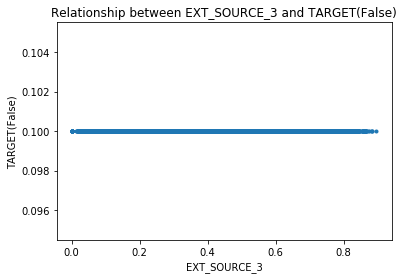

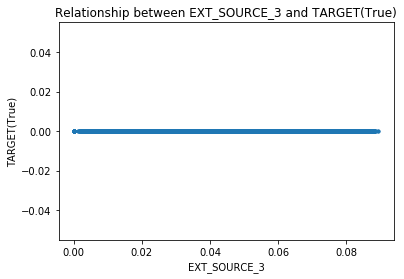

In [6]:
# EXT_SOURCE_3 與 TARGET 相關係數
corr = np.corrcoef(GetVaildValue(app_train, 'EXT_SOURCE_3', 'EXT_SOURCE_3'), GetVaildValue(app_train, 'EXT_SOURCE_3', 'TARGET'))
print("Correlation: %.4f" % (corr[0][1]))

app_train_Target_False = app_train[app_train['TARGET'] != False]
plt.plot(app_train_Target_False['EXT_SOURCE_3'], app_train_Target_False['TARGET'] / 10, '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET(False)')
plt.title('Relationship between EXT_SOURCE_3 and TARGET(False)')
plt.show()

app_train_Target_True = app_train[app_train['TARGET'] != True]
plt.plot(app_train_Target_True['EXT_SOURCE_3'] / 10, app_train_Target_True['TARGET'], '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET(True)')
plt.title('Relationship between EXT_SOURCE_3 and TARGET(True)')
plt.show()

Correlation: -0.1789


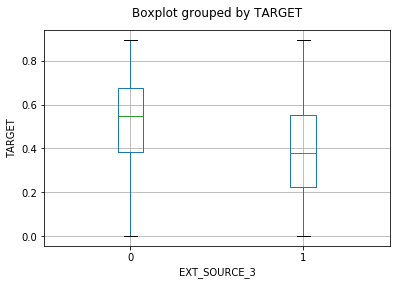

In [7]:
app_train.boxplot(column = 'EXT_SOURCE_3', by = 'TARGET')
plt.title('')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
print("Correlation: %.4f" % (corr[0][1]))

Correlation: 0.0750


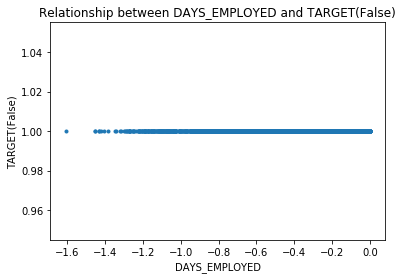

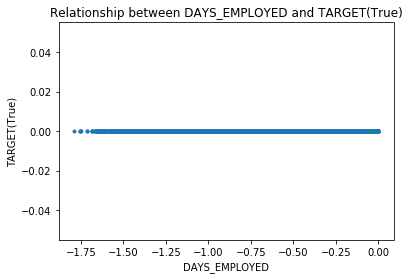

In [8]:
# DAYS_EMPLOYED 與 TARGET 相關係數

corr = np.corrcoef(GetVaildValue(app_train, 'DAYS_EMPLOYED', 'DAYS_EMPLOYED'), GetVaildValue(app_train, 'DAYS_EMPLOYED', 'TARGET'))
print("Correlation: %.4f" % (corr[0][1]))

plt.plot(app_train_Target_False['DAYS_EMPLOYED'] / 10000, app_train_Target_False['TARGET'], '.')
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('TARGET(False)')
plt.title('Relationship between DAYS_EMPLOYED and TARGET(False)')
plt.show()

plt.plot(app_train_Target_True['DAYS_EMPLOYED'] / 10000, app_train_Target_True['TARGET'], '.')
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('TARGET(True)')
plt.title('Relationship between DAYS_EMPLOYED and TARGET(True)')
plt.show()

Correlation: 0.0420


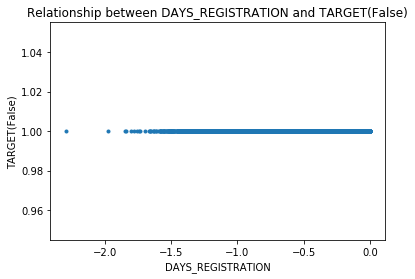

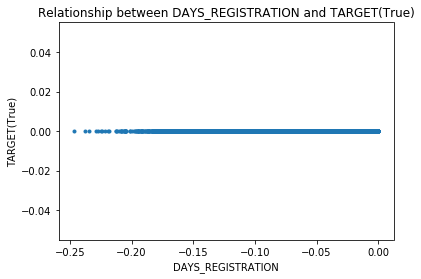

In [9]:
# DAYS_REGISTRATION 與 TARGET 相關係數

corr = np.corrcoef(GetVaildValue(app_train, 'DAYS_REGISTRATION', 'DAYS_REGISTRATION'), GetVaildValue(app_train, 'DAYS_REGISTRATION', 'TARGET'))
print("Correlation: %.4f" % (corr[0][1]))

plt.plot(app_train_Target_False['DAYS_REGISTRATION'] / 10000, app_train_Target_False['TARGET'], '.')
plt.xlabel('DAYS_REGISTRATION')
plt.ylabel('TARGET(False)')
plt.title('Relationship between DAYS_REGISTRATION and TARGET(False)')
plt.show()

plt.plot(app_train_Target_True['DAYS_REGISTRATION'] / 100000, app_train_Target_True['TARGET'], '.')
plt.xlabel('DAYS_REGISTRATION')
plt.ylabel('TARGET(True)')
plt.title('Relationship between DAYS_REGISTRATION and TARGET(True)')
plt.show()